# DMI and Anisotropic Exchange
## Wes Roberts
## Computational Physics Fall 2020

Previously I wrote a loop that plots ground state energy as a function of the component of the DM vector in one direction.

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

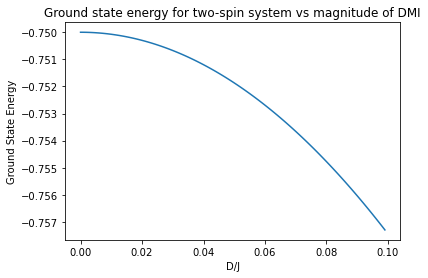

In [6]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
J = 1.


for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(Dmag, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("D/J")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy for two-spin system vs magnitude of DMI");

#pyplot.plot(Dmag, splitting)




It's worthwhile to compare this to just the Heisenberg case. 

The eigenvectors for DMI (at max value calculated) are:

[[-0.049+0.j    -0.816+0.j     0.   +0.j    -0.575+0.j   ]
 [-0.474+0.523j -0.204-0.204j  0.392+0.311j  0.33 +0.245j]
 [ 0.523-0.474j -0.204-0.204j  0.392+0.311j  0.245+0.33j ]
 [-0.   +0.049j  0.   -0.408j -0.081-0.702j -0.   +0.575j]]


The eigenvectors for Heisenberg are: 

[[ 0.     1.     0.     0.   ]
 [ 0.707  0.     0.707  0.   ]
 [-0.707  0.     0.707  0.   ]
 [ 0.     0.     0.     1.   ]]



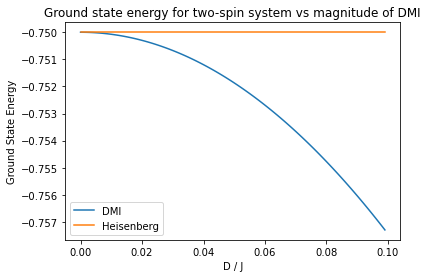

In [38]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))

# Get energies for the non-zero DMI

for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]
    
 
# Get energy for the zero DMI case (Heisenberg)

energyH = np.zeros(dD)

for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*0  # No DMI
    Dy = dD*0
    Dz = dD*0

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vH = np.linalg.eigh(H) 
    #print(w[0])
    
    energyH[j] = w[0]
    #splitting[j] = w[3] - w[2]


vD = vD.round(3)    
vH = vH.round(3)

pyplot.plot(Dmag, energy);

pyplot.xlabel('D / J')
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy for two-spin system vs magnitude of DMI");

pyplot.plot(Dmag, energyH);

pyplot.legend(['DMI','Heisenberg']);


print(f'The eigenvectors for DMI (at max value calculated) are:')
print()
print(vD)
print()

print()
print(f'The eigenvectors for Heisenberg are: ')
print()
print(vH)
print()


What's happening? We see that as we turn the DMI on, the ground state energy is lowered. I think we can intuitively compare to two things: classical case, and quantum particle in a box. 

Classical case: pretty simple. The neighboring spins can adopt a new orientation with a non-zero cross product, and this lowers the energy. We see, for example, that the singlet state goes to some nontrivial ground state as we turn on the DMI. The component states are not just anti-aligned. They have some amplitude to me measured pointing in the same direction, which we can read off from the ground state vector.

Particle in a box: recall that the particle in a box can lower its energy by increasing the length of the box, or the area over which it can wander. Here I think a similar phenomena is happening, but rather than allowing the electrons a larger region in which to tunnel, we are offering them more ways to tunnel. Fundamentally, this proceeds by turning on SOC - we allow even aligned states to lower their energy, because an electron that is spin up is no longer stuck where it is if its neighbors are spin up. SOC provides a way for the spin to rotate as it tunnels to its neighbor. Thus, these particles have more ways to spread themselves out, and the energy is lowered. Or, maybe better put, there is a new ground state with defined energy lower than the previous ground state, and the new configuration accounts for these new ways in which particles can spread themselves out.

Can we watch the ground state change as we turn on the DMI?

In [44]:
dD = 20

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))



for j in range(dD):
    Dmag[j] = dD*j*0.0001
    
    Dx = dD*j*0.0001j  
    Dy = dD*j*0.0001
    Dz = dD*j*0.0001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    
    
    vD = vD.round(3)    

    print(f"D/J = {Dmag[j]}:")
    print()
    print(vD)
    print()
    print()
    
    energy[j] = w[0]
    
    



D/J = 0.0:

[[ 0.   +0.j  1.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [-0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  1.   +0.j]]


D/J = 0.002:

[[ 0.001-0.j     0.588+0.j    -0.567+0.j    -0.577+0.j   ]
 [ 0.499-0.5j    0.449+0.318j  0.171+0.036j  0.29 +0.288j]
 [-0.5  +0.499j  0.449+0.318j  0.171+0.036j  0.288+0.29j ]
 [ 0.   -0.001j -0.131-0.179j -0.136-0.774j  0.   +0.577j]]


D/J = 0.004:

[[ 0.002+0.j     0.8  +0.j    -0.161-0.j    -0.577-0.j   ]
 [ 0.499-0.501j  0.111+0.159j -0.485-0.246j  0.29 +0.287j]
 [-0.501+0.499j  0.111+0.159j -0.485-0.246j  0.287+0.29j ]
 [-0.   -0.002j  0.048+0.531j  0.239+0.57j  -0.   +0.577j]]


D/J = 0.006:

[[ 0.003-0.j     0.518+0.j    -0.632+0.j    -0.577+0.j   ]
 [ 0.498-0.501j  0.471+0.31j   0.122-0.01j   0.291+0.286j]
 [-0.501+0.498j  0.471+0.31j   0.122-0.01j   0.286+0.291j]
 [ 0.   -0.003j -0.161-0.264j -0.132-0.744j  0.   +0.577j]]


D/J = 0.008:

[[ 0.004-0.j     0.408+0

Interestingly, the first thing that happens to the singlet is that it takes complex amplitudes. For very small D/J, the amplitudes for the anti-aligned states are complex, but the amplitudes for aligned states remain very small. 

In [46]:
np.absolute(vD[1,0])**2

0.49918100000000004

For the ground state, plot the probability of measuring the spins to be aligned in the z (either both up or both down) at various values of D/J.

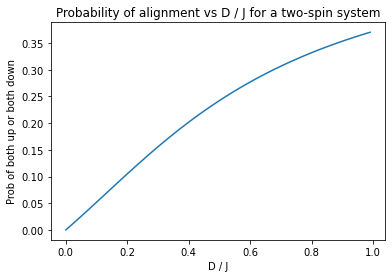

In [53]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)


nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))

probs = np.zeros(dD)

for j in range(dD):
    Dmag[j] = dD*j*0.0001
    
    Dx = dD*j*0.0001j  
    Dy = dD*j*0.0001
    Dz = dD*j*0.0001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    
    probs[j] = np.absolute(vD[0,0])**2 + np.absolute(vD[3,0])
    
    #vD = vD.round(3)    

    
    energy[j] = w[0]
    
    
pyplot.plot(Dmag, probs)
pyplot.title("Probability of alignment vs D / J for a two-spin system")
pyplot.xlabel('D / J')
pyplot.ylabel('Prob of both up or both down');



What about letting D become larger than J (which realistically shouldn't happen, because D is perturbative and should be an order of magnitude smaller than J)?

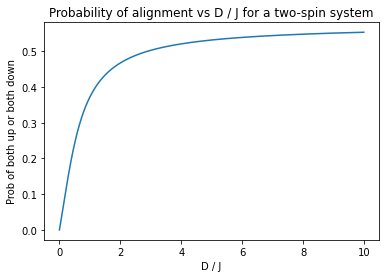

In [54]:
dD = 1000

Dmag = np.zeros(dD)
energy = np.zeros(dD)


nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))

probs = np.zeros(dD)

for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    
    probs[j] = np.absolute(vD[0,0])**2 + np.absolute(vD[3,0])
    
    #vD = vD.round(3)    

    
    energy[j] = w[0]
    
    
pyplot.plot(Dmag, probs)
pyplot.title("Probability of alignment vs D / J for a two-spin system")
pyplot.xlabel('D / J')
pyplot.ylabel('Prob of both up or both down');




What if now we vary the direction of D rather than the magnitude? Choose D / J = .1 and rotate the D vector. 

Note that a vector with magnitude D can be represented in spherical coorinates as $D_x = D\sin{\theta}\cos{\phi}$, $D_y = D\sin{\theta}\sin{\phi}$, $D_z = D\cos{\theta}$.

Need two loops that run through $\theta$ in $[0, \pi]$ and $\phi$ in $[0, 2\pi]$.

In [ ]:
Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

steps = 100



nsites = 2
J = 1.
D = 0.1

for j in range(steps): # outer loop for theta
    
    
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(Dmag, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("D/J")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy for two-spin system vs magnitude of DMI");

#pyplot.plot(Dmag, splitting)

